<a id='0'></a>
# <p style="background-color:skyblue; font-family:newtimeroman; font-size:250%; text-align:center; border-radius: 15px 50px;">Credit Card fraud Detection🖋📝 - EDA📚 & Baseline Model🎯 </p>

<a id='1'></a>
# <p style="background-color:red; font-family:newtimeroman; font-size:120%; text-align:center; border-radius: 10px 25px;">Table of Content</p>
* [1. Importing necessary modules and libraries📚](#1)
* [2. Data Exploration🔍](#2)
* [3. Data Cleaning🔧](#3)
* [4. Data Vizualization🎨](#4)
* [5. Machine Learning model training📝](#5)

<a id='1'></a>
# <p style="background-color:skyblue; font-family:newtimeroman; font-size:250%; text-align:center; border-radius: 15px 50px;">1. Importing necessary modules and libraries📚</p>

In [30]:
# !pip install dataprep

In [1]:
#Importing the Required Librarires
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

# from dataprep.eda import plot, plot_correlation, create_report, plot_missing
# pd.options.display.max_columns = 100
# pd.options.display.max_rows = 900
# pd.set_option('float_format', '{:f}'.format)

import matplotlib
import matplotlib.pyplot as plt
# Imported Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time
%matplotlib inline


# Other Libraries

from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE   
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

## About the Dataset
   This is a simulated credit card transaction dataset containing legitimate and fraud transactions from the duration 1st Jan 2019 - 31st Dec 2020. It covers credit cards of 1000 customers doing transactions with a pool of 800 merchants.
## Data Description

* trans_date_trans_time: date and time of the transaction
* cc_num: credit card number of customer
* merchant: customer is paying to which merchant(like Amazon, Walmart)
## category:
* amt: the amount of transaction
* first: first name of customer
* last: last anme of customer
* gender: gender of the customer
* street, city, state: address of the customer
* zip: zip code of the transaction
* lat: latitude of the customer
* long: longitude of customer
* city_pop: population of the city he is living
* job: job of cus
* dob: date of birth of the customer
* trans_num: unique transaction number for each and every transaction
* unix_time: time of the transaction in Unix( generally not used in our analysis as it is unique mostly)
* merch_lat: merchant lattitude
* merch_long: merchant longitude
* is_fraud: whether transaction is fraud or no (1- fraud, 0- not fraud)

<a id='2'></a>
# <p style="background-color:skyblue; font-family:newtimeroman; font-size:150%; text-align:center; border-radius: 15px 50px;">2. Data Exploration🔍</p>

In [32]:
import pandas as pd

In [3]:
#Reading two data sets and printing top 5 rows
df= pd.read_csv("fraudTrain.csv")
df.head()

Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      lat      long  \
0    Banks      F                561 Perry Cove  ...  36.0788  -81.1781   
1     Gill      F  43039 Riley Greens Suite 393  ...  48.8878 -118.2105   
2  Sanchez      M      594 White Dale Suite 530  ...  42.1808 -112.2620   
3    White      M   9443 Cynthia Court Apt. 038  ...  46.2306 -112.1138   
4   Garcia      M              408 Bradley Rest  ...  38.4207  -79.4629   

   city_pop                                job         dob  \
0      3495          Psychologist, counselling  1988-03-09   
1       149  Special educational needs teacher  1978-06-21   
2      4154        Nature conservation officer  1962-01-19   
3      1939                    Patent attorney  1967-01-12   
4        99     Dance movement psychotherapist  1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0  

[5 rows x 23 columns]

In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
df.shape

(1296675, 22)

In [6]:
df.is_fraud.value_counts()

0    1289169
1       7506
Name: is_fraud, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop          

In [8]:
#Checking null values
df.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

### Observations :
* From above we can observe that there is no null or missing values present in this dataset ..

In [9]:
# print the shape of dataset
df.shape

(1296675, 22)

### Observations :
* From above we can observe that there is 23 features and 1296675 rows 

### Distribution of Dependent Variable

In [10]:
df_fraud=df[['is_fraud','trans_date_trans_time']].groupby('is_fraud').count().reset_index()
df_fraud.columns=['is_fraud','count']
df_fraud['percentage']=(df_fraud['count']/df_fraud['count'].sum())*100
df_fraud

is_fraud    count  percentage
0         0  1289169   99.421135
1         1     7506    0.578865

This is highly imbalanced class data, so later we need to balance the dependent variable

# Handling Imbalanced Dataset Using UnderSampling

In [11]:
def under_sampling(df):
    fraud_len = df.is_fraud.value_counts()[1]      # counting number of fraud values
    no_fraud_indexes = df[df.is_fraud==0].index    # storing indexes of no fraud 
    fraud_indexes = df[df.is_fraud==1].index       # storing the indexes of fraud
    random_no_fraud_indexes = np.random.choice(no_fraud_indexes,fraud_len,replace=False)  # selecting random indexes data from majority class
    final_indexes = np.concatenate([fraud_indexes,random_no_fraud_indexes])   # combining fraud and no fraud indexes
    undersample_df = df.loc[final_indexes]                                    # selecting final data from the dataframe
#     print(len(undersample_df))
    return undersample_df                   # returning the final df
df = under_sampling(df)

In [12]:
#Finiding unique values in each column
df.nunique()

trans_date_trans_time    15004
cc_num                     978
merchant                   693
category                    14
amt                      11470
first                      351
last                       479
gender                       2
street                     978
city                       890
state                       51
zip                        966
lat                        964
long                       965
city_pop                   878
job                        493
dob                        963
trans_num                15012
unix_time                15004
merch_lat                15008
merch_long               15010
is_fraud                     2
dtype: int64

In [13]:
# plot(df)

In [14]:
#create_report(df)

In [15]:
# plot(df, "state")

In [16]:
# plot(df, "amt", "state")

<a id='3'></a>
# <p style="background-color:skyblue; font-family:newtimeroman; font-size:150%; text-align:center; border-radius: 15px 50px;">3. Data Cleaning🔧</p>

In [17]:
#  Converting data type of trans_date_trans_time to datetime
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

df.dtypes['trans_date_trans_time']

dtype('<M8[ns]')

In [18]:
# Derive 'Transaction Hour' Feature from 'Transaction Time' Feature
df['trans_hour'] = df['trans_date_trans_time'].dt.hour
df['trans_hour']

2449        1
2472        1
2523        3
2546        3
2553        3
           ..
1256084     5
515738      9
368209     20
1241736    17
721753      5
Name: trans_hour, Length: 15012, dtype: int64

In [19]:
# Derive 'Day of Week' Feature from 'Transaction Time' Feature
df['day_of_week'] = df['trans_date_trans_time'].dt.day_name()
df['day_of_week']

2449       Wednesday
2472       Wednesday
2523       Wednesday
2546       Wednesday
2553       Wednesday
             ...    
1256084       Sunday
515738        Sunday
368209     Wednesday
1241736       Monday
721753        Monday
Name: day_of_week, Length: 15012, dtype: object

In [20]:
# let's print top 5 rows from the dataset
df.head()

trans_date_trans_time           cc_num                          merchant  \
2449   2019-01-02 01:06:37    4613314721966            fraud_Rutherford-Mertz   
2472   2019-01-02 01:47:29  340187018810220  fraud_Jenkins, Hauck and Friesen   
2523   2019-01-02 03:05:23  340187018810220            fraud_Goodwin-Nitzsche   
2546   2019-01-02 03:38:03    4613314721966            fraud_Erdman-Kertzmann   
2553   2019-01-02 03:55:47  340187018810220                fraud_Koepp-Parker   

           category     amt  first    last gender                     street  \
2449    grocery_pos  281.06  Jason  Murphy      M  542 Steve Curve Suite 011   
2472  gas_transport   11.52  Misty    Hart      F  27954 Hall Mill Suite 575   
2523    grocery_pos  276.31  Misty    Hart      F  27954 Hall Mill Suite 575   
2546  gas_transport    7.03  Jason  Murphy      M  542 Steve Curve Suite 011   
2553    grocery_pos  275.73  Misty    Hart      F  27954 Hall Mill Suite 575   

               city  ... city_pop                       job         dob  \
2449  Collettsville  ...      885            Soil scientist  1988-09-15   
2472    San Antonio  ...  1595797  Horticultural consultant  1960-10-28   
2523    San Antonio  ...  1595797  Horticultural consultant  1960-10-28   
2546  Collettsville  ...      885            Soil scientist  1988-09-15   
2553    San Antonio  ...  1595797  Horticultural consultant  1960-10-28   

                             trans_num   unix_time  merch_lat merch_long  \
2449  e8a81877ae9a0a7f883e15cb39dc4022  1325466397  36.430124 -81.179483   
2472  bc7d41c41103877b03232f03f1f8d3f5  1325468849  29.819364 -99.142791   
2523  b98f12f4168391b2203238813df5aa8c  1325473523  29.273085 -98.836360   
2546  397894a5c4c02e3c61c784001f0f14e4  1325475483  35.909292 -82.091010   
2553  7863235a750d73a244c07f1fb7f0185a  1325476547  29.786426 -98.683410   

     is_fraud  trans_hour  day_of_week  
2449        1           1    Wednesday  
2472        1           1    Wednesday  
2523        1           3    Wednesday  
2546        1           3    Wednesday  
2553        1           3    Wednesday  

[5 rows x 24 columns]

In [21]:
# Derive 'Year Month' Feature from 'Transaction Time' Feature
df['year_month'] = df['trans_date_trans_time'].dt.to_period('M')
df['year_month']

2449       2019-01
2472       2019-01
2523       2019-01
2546       2019-01
2553       2019-01
            ...   
1256084    2020-06
515738     2019-08
368209     2019-06
1241736    2020-06
721753     2019-11
Name: year_month, Length: 15012, dtype: period[M]

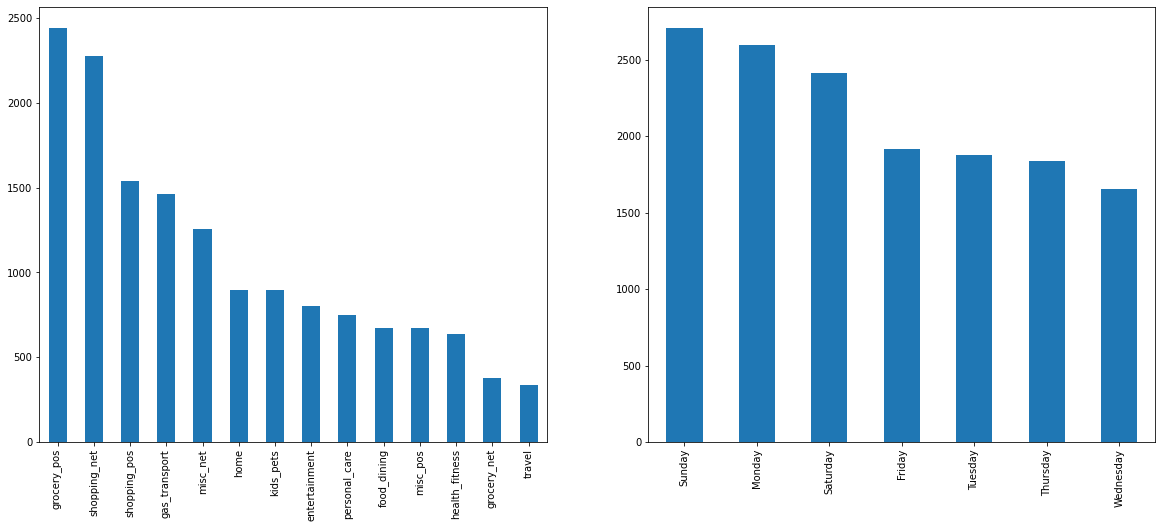

In [22]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
df['category'].value_counts().plot.bar();
plt.subplot(1,2,2)
df['day_of_week'].value_counts().plot.bar();

## Observations :
* Sunday and Monday of the week have highest credit card transactions
* For the Gas_transport purpose most of them used Credit card for their transactions ..
* Leastly for Travelling purpose they used credit card transactions ... 


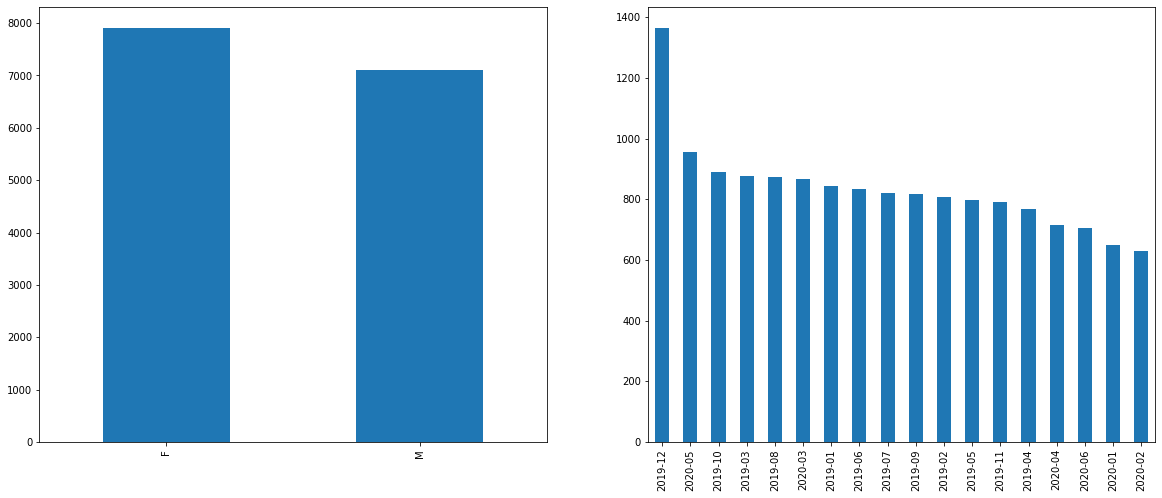

In [23]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
df['gender'].value_counts().plot.bar();
plt.subplot(1,2,2)
df['year_month'].value_counts().plot.bar();


## Observations :
* Highest number of Transactions are in month of December
* Lowest number of Transactions happens in February 
* Most of them who used credit card transactions are Females when compared to Males ..


In [24]:
df.state.value_counts(normalize=True)

NY    0.069611
TX    0.066347
PA    0.059486
CA    0.044564
OH    0.041633
FL    0.036104
IL    0.034506
MI    0.031708
AL    0.030109
MO    0.028311
MN    0.027045
SC    0.023914
KY    0.023381
VA    0.023181
WI    0.022915
AR    0.022915
NC    0.021250
IN    0.020917
NE    0.020850
MD    0.020584
WV    0.020117
GA    0.019917
OK    0.019851
IA    0.019651
KS    0.018652
NJ    0.017319
OR    0.016986
TN    0.014588
ME    0.014522
MS    0.014388
WY    0.014189
WA    0.014122
LA    0.013656
CO    0.012990
NM    0.011524
MA    0.010258
VT    0.009992
ND    0.009792
SD    0.009592
NH    0.007661
AZ    0.007461
UT    0.007327
MT    0.006128
CT    0.004530
NV    0.004530
AK    0.002931
DC    0.002864
ID    0.002398
RI    0.001066
HI    0.001066
DE    0.000600
Name: state, dtype: float64

In [25]:
df.job.value_counts(normalize=True,ascending=False)

Naval architect                   0.007261
Surveyor, land/geomatics          0.007194
Materials engineer                0.006994
Exhibition designer               0.006528
Film/video editor                 0.006262
                                    ...   
Television camera operator        0.000266
Visual merchandiser               0.000200
Hydrogeologist                    0.000200
Designer, television/film set     0.000200
Investment banker, operational    0.000067
Name: job, Length: 493, dtype: float64

##### Derive Age of the Customer: 

````
Age of Customer = Trasaction Date - DOB
````

In [26]:
df['dob'] = pd.to_datetime(df['dob'])

df['age'] = np.round((df['trans_date_trans_time'] - df['dob'])/np.timedelta64(1,'Y'))

df['age'].describe()

count    15012.000000
mean        47.278577
std         18.246594
min         14.000000
25%         33.000000
50%         46.000000
75%         59.000000
max         95.000000
Name: age, dtype: float64

## Observations :
* 33-57 age people are 50% of our customers
* Minimum age of customer count is 14 
* Maximum age of customer count is 96

In [27]:
##  Distribution of amt
pd.concat(
[df['amt'].describe(percentiles = [0.5,0.95,0.999])\
.reset_index().rename(columns={'index': 'Row Type', 'amt':'Overall Amt Distribution'}),
df.loc[df['is_fraud']==0,['amt']].describe(percentiles = [0.5,0.95,0.999])\
.reset_index(drop = 1).rename(columns={'amt':'Non Fraud Amt Distribution'}),
df.loc[df['is_fraud']==1,['amt']].describe(percentiles = [0.5,0.95,0.999])\
.reset_index(drop = 1).rename(columns={'amt':'Fraud Amt Distribution'})],
axis=1
)

Row Type  Overall Amt Distribution  Non Fraud Amt Distribution  \
0    count              15012.000000                 7506.000000   
1     mean                300.258201                   69.196310   
2      std                389.763870                  211.000947   
3      min                  1.000000                    1.000000   
4      50%                 89.040000                   47.705000   
5      95%               1026.588000                  189.205000   
6    99.9%               1328.973580                 1707.230800   
7      max              14849.740000                14849.740000   

   Fraud Amt Distribution  
0             7506.000000  
1              531.320092  
2              390.560070  
3                1.060000  
4              396.505000  
5             1083.985000  
6             1291.038400  
7             1376.040000

## Observations :
* Fraud Transaction mean is way higher than non-fraud transaction
* Mean of Non Fraud Transactions: 67.6
* Mean of Fraud Transactions: 530.6

<a id='4'></a>
# <p style="background-color:skyblue; font-family:newtimeroman; font-size:150%; text-align:center; border-radius: 15px 50px;">4. Data Vizualization🎨</p>

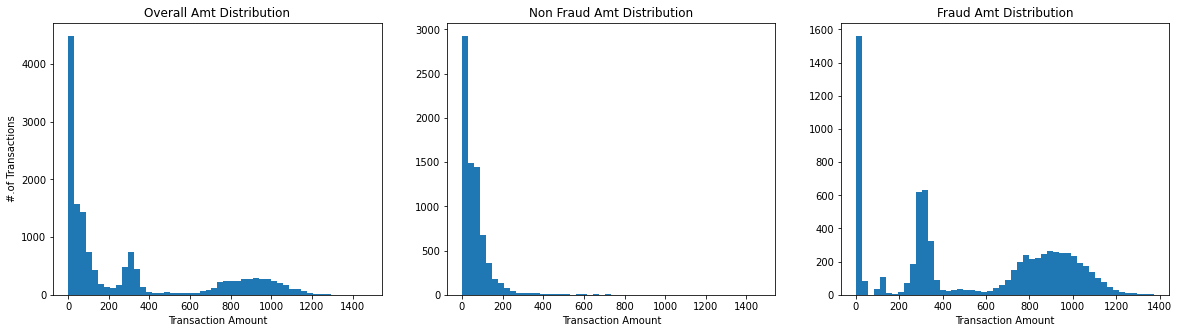

In [28]:
fig, ax = plt.subplots(1,3,figsize=(20,5))
ax[0].hist(df[df['amt']<=1500]['amt'], bins=50)
ax[1].hist(df[(df['is_fraud']==0) & (df['amt']<=1500)]['amt'], bins=50)
ax[2].hist(df[(df['is_fraud']==1) & (df['amt']<=1500)]['amt'], bins=50)

ax[0].set_title('Overall Amt Distribution')
ax[1].set_title('Non Fraud Amt Distribution')
ax[2].set_title('Fraud Amt Distribution')

ax[0].set_xlabel('Transaction Amount')
ax[0].set_ylabel('#.of Transactions')

ax[1].set_xlabel('Transaction Amount')
ax[2].set_xlabel('Transaction Amount')
plt.show()

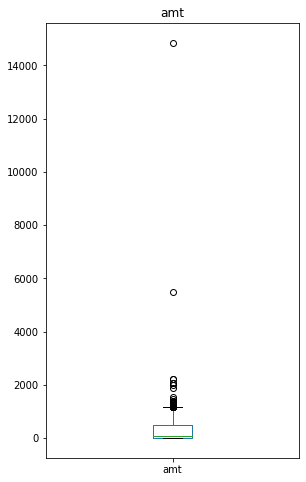

In [29]:
# check outliers in graph
num_cols=['amt']
plt.figure(figsize=[10,8])
for ind, col in enumerate(num_cols):
    plt.subplot(1,2,ind+1)
    df[col].plot.box()
    plt.title(col)
plt.show()

# Detecting and Handling Outliers

In [30]:
numerical_columns = df.select_dtypes(exclude='object').drop(["trans_date_trans_time","dob","year_month"],axis=1).columns

In [31]:
numerical_columns 

Index(['cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'trans_hour', 'age'],
      dtype='object')

cc_num


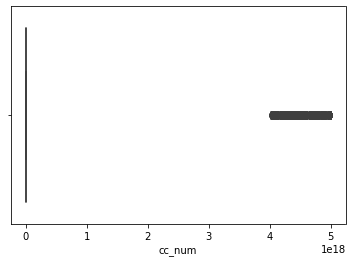

amt


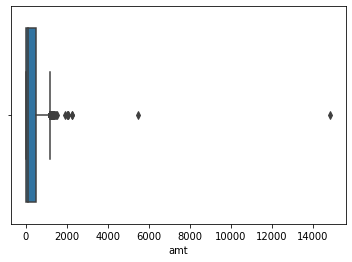

zip


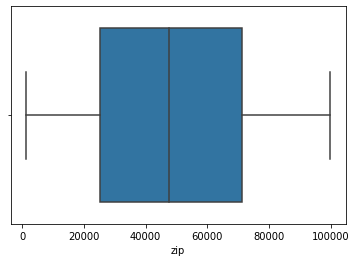

lat


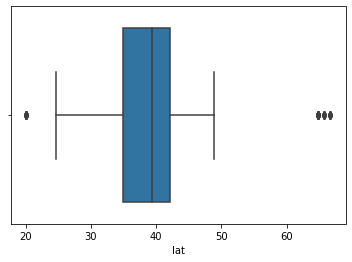

long


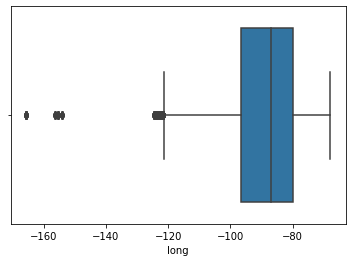

city_pop


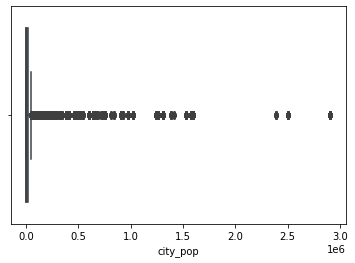

unix_time


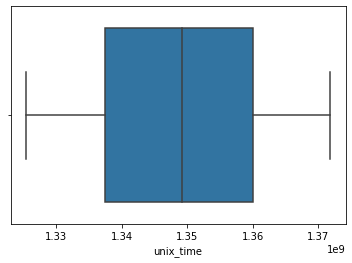

merch_lat


merch_long


is_fraud


trans_hour


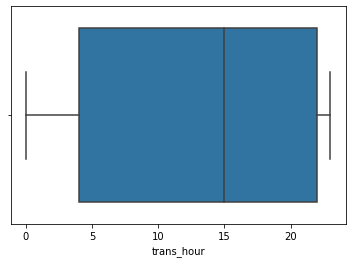

age


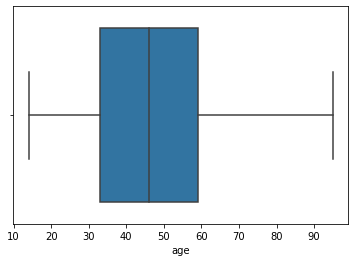

In [32]:
# Boxplots before handling outliers
for i in numerical_columns: # checking for outliers
    print(i)
    sns.boxplot(df[i])
    plt.show()

### handling the outliers


In [33]:
def detect_outliers(df,variable):
    first_quantile = df[variable].quantile(0.25)
    third_quantile = df[variable].quantile(0.75)
    iqr = third_quantile - first_quantile
    lower_bound = (first_quantile - 1.5*iqr)
    upper_bound = (third_quantile + 1.5*iqr)
    high_outliers = df[variable]>upper_bound
    low_outliers = df[variable] < lower_bound
    return df[(low_outliers)|(high_outliers)]

def handle_outliers(df,variable):

    IQR = df[variable].quantile(0.75)-df[variable].quantile(0.25)
    upper_bridge = df[variable].quantile(0.75)+(IQR*1.5)
    low_bridge = df[variable].quantile(0.25)-(IQR*1.5)

    df.loc[df[variable]>=upper_bridge, variable]=upper_bridge
    df.loc[df[variable]<=low_bridge, variable]=abs(low_bridge)

# columns having outliers
outliers_columns = []
for i in numerical_columns:
    if detect_outliers(df,i).shape[0]>1:
        outliers_columns.append(i)
outliers_columns


#Handling Outliers in train data
for feat in outliers_columns:
    handle_outliers(df,feat)


cc_num


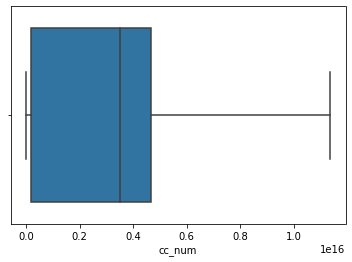

amt


zip


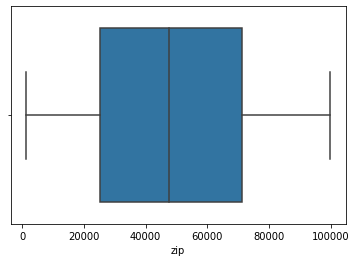

lat


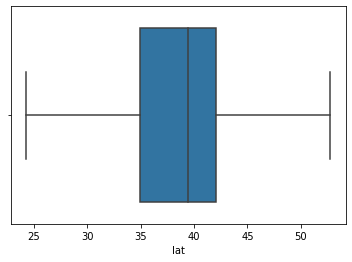

long


city_pop


unix_time


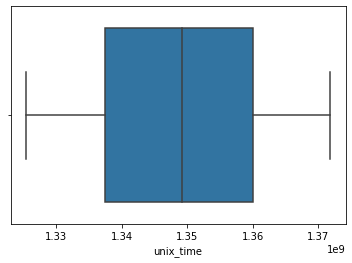

merch_lat


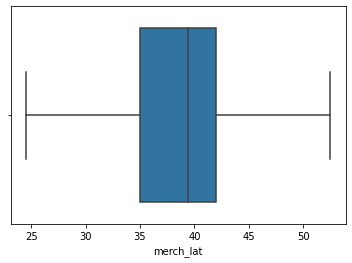

merch_long


is_fraud


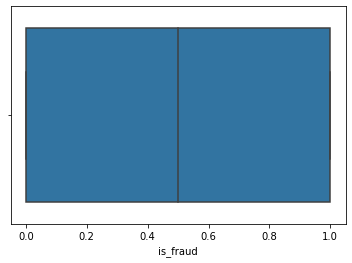

trans_hour


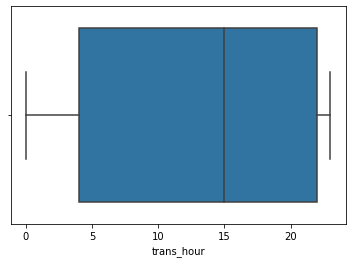

age


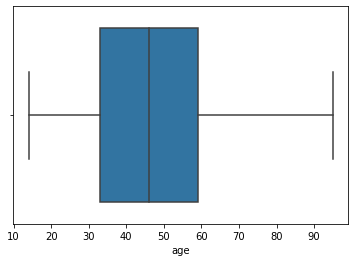

In [34]:
# Boxplots After handling outliers
for i in numerical_columns: # checking for outliers
    print(i)
    sns.boxplot(df[i])
    plt.show()

In [29]:
# Year Month vs Number of Transactions
df_timeline01 = df.groupby(df['year_month'])[['trans_num','cc_num']].nunique().reset_index()
df_timeline01.columns = ['year_month','num_of_transactions','customers']
df_timeline01

year_month  num_of_transactions  customers
0     2019-01                52525        913
1     2019-02                49866        918
2     2019-03                70939        916
3     2019-04                68078        913
4     2019-05                72532        910
5     2019-06                86064        908
6     2019-07                86596        910
7     2019-08                87359        911
8     2019-09                70652        913
9     2019-10                68758        912
10    2019-11                70421        911
11    2019-12               141060        916
12    2020-01                52202        911
13    2020-02                47791        909
14    2020-03                72850        912
15    2020-04                66892        914
16    2020-05                74343        915
17    2020-06                57747        910

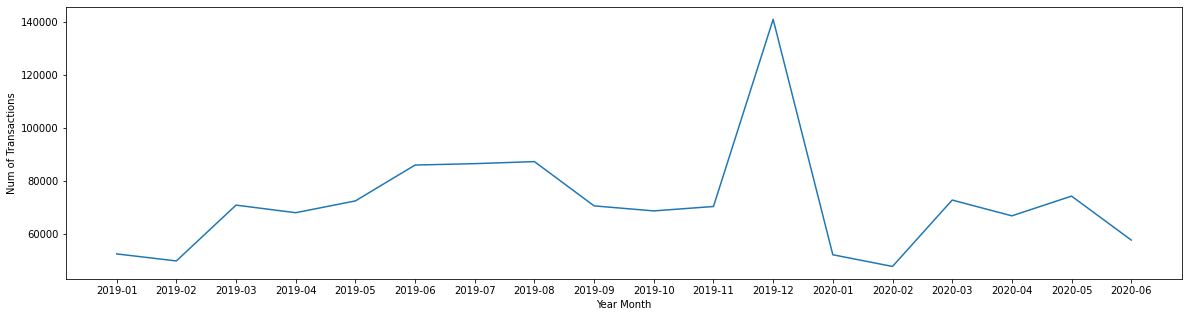

In [30]:
x = np.arange(0,len(df_timeline01),1)

fig, ax = plt.subplots(1,1,figsize=(20,5))
ax.plot(x,df_timeline01['num_of_transactions'])
ax.set_xticks(x)
ax.set_xticklabels(df_timeline01['year_month'])

ax.set_xlabel('Year Month')
ax.set_ylabel('Num of Transactions')
plt.show()


In [31]:
## Year Month vs Number of Customers Done the Transactions
x = np.arange(0,len(df_timeline01),1)

fig, ax = plt.subplots(1,1,figsize=(20,5))
ax.plot(x,df_timeline01['customers'])
ax.set_xticks(x)
ax.set_xticklabels(df_timeline01['year_month'])

ax.set_xlabel('Year Month')
ax.set_ylabel('Num of Customers')
plt.show()


In [32]:
## Fraud Transactions
df_fraud_transactions = df[df['is_fraud']==1]

df_timeline02 = df_fraud_transactions.groupby(df_fraud_transactions['year_month'])[['trans_num','cc_num']].nunique().reset_index()
df_timeline02.columns = ['year_month','num_of_fraud_transactions','fraud_customers']
df_timeline02

year_month  num_of_fraud_transactions  fraud_customers
0     2019-01                        506               50
1     2019-02                        517               53
2     2019-03                        494               49
3     2019-04                        376               41
4     2019-05                        408               42
5     2019-06                        354               35
6     2019-07                        331               36
7     2019-08                        382               39
8     2019-09                        418               44
9     2019-10                        454               50
10    2019-11                        388               41
11    2019-12                        592               62
12    2020-01                        343               40
13    2020-02                        336               35
14    2020-03                        444               45
15    2020-04                        302               36
16    2020-05                        527               54
17    2020-06                        334               36

In [33]:
print(df_timeline02['num_of_fraud_transactions'].mean())

417.0


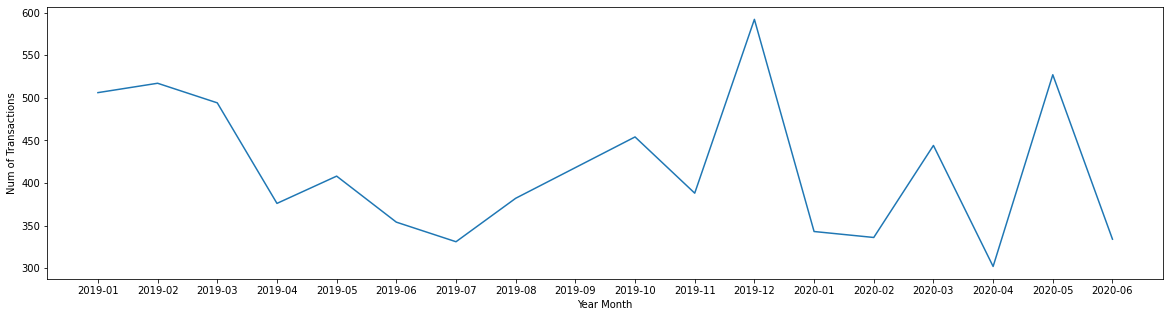

In [34]:
x = np.arange(0,len(df_timeline02),1)

fig, ax = plt.subplots(1,1,figsize=(20,5))
ax.plot(x,df_timeline02['num_of_fraud_transactions'])
ax.set_xticks(x)
ax.set_xticklabels(df_timeline02['year_month'])

ax.set_xlabel('Year Month')
ax.set_ylabel('Num of Transactions')
plt.show()

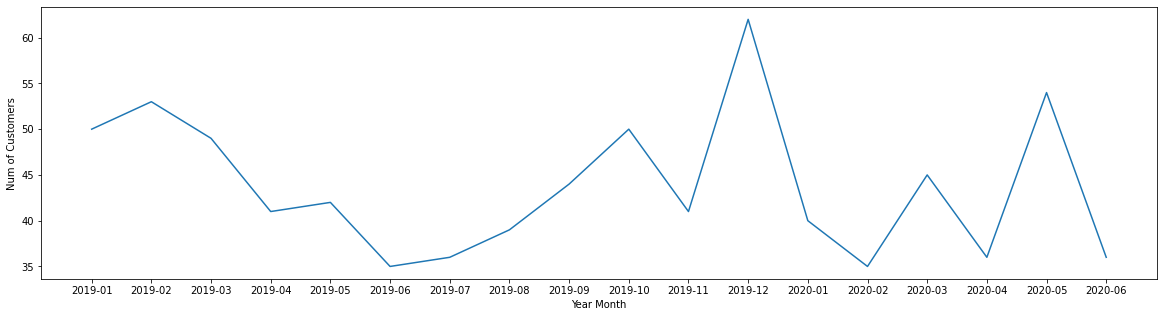

In [35]:
x = np.arange(0,len(df_timeline02),1)

fig, ax = plt.subplots(1,1,figsize=(20,5))
ax.plot(x,df_timeline02['fraud_customers'])
ax.set_xticks(x)
ax.set_xticklabels(df_timeline02['year_month'])

ax.set_xlabel('Year Month')
ax.set_ylabel('Num of Customers')
plt.show()

#### Gender

In [36]:
df_gender = df[['gender','trans_num']].groupby(['gender']).count().reset_index()
df_gender.columns = ['Gender','gender_count']

df_gender['percent'] = (df_gender['gender_count']/df_gender['gender_count'].sum())*100

df_gender

Gender  gender_count    percent
0      F        709863  54.744867
1      M        586812  45.255133

Females customers are higher than male

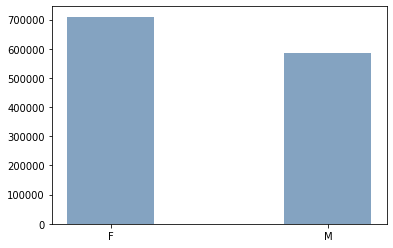

In [37]:
plt.bar(df_gender['Gender'], df_gender['gender_count'], color=(0.2, 0.4, 0.6, 0.6),  
        width = 0.4)

plt.show()

In [38]:
df_fraud_gender = df[['gender','is_fraud','trans_num']].groupby(['gender','is_fraud']).count().reset_index()
df_fraud_gender.columns = ['Gender','is_fraud','count']

df_fraud_gender = df_fraud_gender.merge(df_gender[['Gender','gender_count']],how='inner',\
                                  left_on='Gender',right_on='Gender')


df_fraud_gender['percent_grp'] = (df_fraud_gender['count']/df_fraud_gender['gender_count'])*100


df_fraud_gender

Gender  is_fraud   count  gender_count  percent_grp
0      F         0  706128        709863    99.473842
1      F         1    3735        709863     0.526158
2      M         0  583041        586812    99.357375
3      M         1    3771        586812     0.642625

##### Category

In [39]:
df_category = df[['category','trans_num']].groupby(['category']).count().reset_index()
df_category.columns = ['Category','category_count']

df_category['percent'] = (df_category['category_count']/df_category['category_count'].sum())*100

df_category.sort_values(by = ['percent'], ascending=False)

Category  category_count    percent
2    gas_transport          131659  10.153585
4      grocery_pos          123638   9.535003
6             home          123115   9.494669
12    shopping_pos          116672   8.997783
7        kids_pets          113035   8.717296
11    shopping_net           97543   7.522548
0    entertainment           94014   7.250390
1      food_dining           91461   7.053502
10   personal_care           90758   6.999287
5   health_fitness           85879   6.623017
9         misc_pos           79655   6.143020
8         misc_net           63287   4.880714
3      grocery_net           45452   3.505273
13          travel           40507   3.123913

gas_transport holds for 10% of the transactions 

In [40]:
df_category = df_category.sort_values(by = ['percent'], ascending=False).reset_index()
df_category

index        Category  category_count    percent
0       2   gas_transport          131659  10.153585
1       4     grocery_pos          123638   9.535003
2       6            home          123115   9.494669
3      12    shopping_pos          116672   8.997783
4       7       kids_pets          113035   8.717296
5      11    shopping_net           97543   7.522548
6       0   entertainment           94014   7.250390
7       1     food_dining           91461   7.053502
8      10   personal_care           90758   6.999287
9       5  health_fitness           85879   6.623017
10      9        misc_pos           79655   6.143020
11      8        misc_net           63287   4.880714
12      3     grocery_net           45452   3.505273
13     13          travel           40507   3.123913

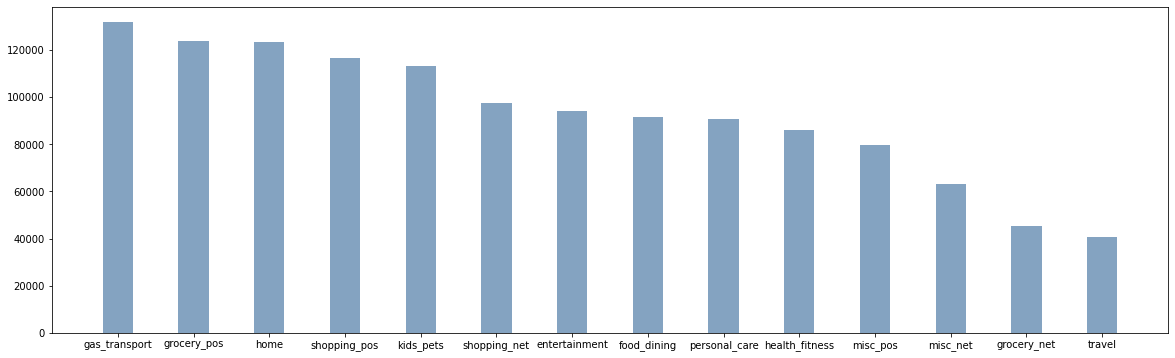

In [41]:
fig = plt.figure(figsize = (20, 6)) 


plt.bar(df_category['Category'], df_category['category_count'], color=(0.2, 0.4, 0.6, 0.6),  
        width = 0.4)

plt.show()

In [42]:
df_fraud_category = df[['category','is_fraud','trans_num']].groupby(['category','is_fraud']).count().reset_index()
df_fraud_category.columns = ['Category','is_fraud','count']

df_fraud_category = df_fraud_category.merge(df_category[['Category','category_count','percent']],how='inner',\
                                  left_on='Category',right_on='Category')


df_fraud_category['percent_grp'] = (df_fraud_category['count']/df_fraud_category['category_count'])*100


In [43]:
df_fraud_category.sort_values(by = ['category_count'], ascending=False)

Category  is_fraud   count  category_count    percent  percent_grp
4    gas_transport         0  131041          131659  10.153585    99.530606
5    gas_transport         1     618          131659  10.153585     0.469394
8      grocery_pos         0  121895          123638   9.535003    98.590239
9      grocery_pos         1    1743          123638   9.535003     1.409761
13            home         1     198          123115   9.494669     0.160825
12            home         0  122917          123115   9.494669    99.839175
25    shopping_pos         1     843          116672   8.997783     0.722538
24    shopping_pos         0  115829          116672   8.997783    99.277462
14       kids_pets         0  112796          113035   8.717296    99.788561
15       kids_pets         1     239          113035   8.717296     0.211439
23    shopping_net         1    1713           97543   7.522548     1.756149
22    shopping_net         0   95830           97543   7.522548    98.243851
1    entertainment         1     233           94014   7.250390     0.247835
0    entertainment         0   93781           94014   7.250390    99.752165
3      food_dining         1     151           91461   7.053502     0.165098
2      food_dining         0   91310           91461   7.053502    99.834902
20   personal_care         0   90538           90758   6.999287    99.757597
21   personal_care         1     220           90758   6.999287     0.242403
11  health_fitness         1     133           85879   6.623017     0.154869
10  health_fitness         0   85746           85879   6.623017    99.845131
18        misc_pos         0   79405           79655   6.143020    99.686147
19        misc_pos         1     250           79655   6.143020     0.313853
16        misc_net         0   62372           63287   4.880714    98.554205
17        misc_net         1     915           63287   4.880714     1.445795
7      grocery_net         1     134           45452   3.505273     0.294817
6      grocery_net         0   45318           45452   3.505273    99.705183
26          travel         0   40391           40507   3.123913    99.713630
27          travel         1     116           40507   3.123913     0.286370

grocery_pos and shopping_net has more number of fraud transactions compared to other categories

In [44]:
df_fraud=df_fraud_category[df_fraud_category['is_fraud'] == 1].sort_values(by = ['percent_grp'])
df_fraud

Category  is_fraud  count  category_count    percent  percent_grp
11  health_fitness         1    133           85879   6.623017     0.154869
13            home         1    198          123115   9.494669     0.160825
3      food_dining         1    151           91461   7.053502     0.165098
15       kids_pets         1    239          113035   8.717296     0.211439
21   personal_care         1    220           90758   6.999287     0.242403
1    entertainment         1    233           94014   7.250390     0.247835
27          travel         1    116           40507   3.123913     0.286370
7      grocery_net         1    134           45452   3.505273     0.294817
19        misc_pos         1    250           79655   6.143020     0.313853
5    gas_transport         1    618          131659  10.153585     0.469394
25    shopping_pos         1    843          116672   8.997783     0.722538
9      grocery_pos         1   1743          123638   9.535003     1.409761
17        misc_net         1    915           63287   4.880714     1.445795
23    shopping_net         1   1713           97543   7.522548     1.756149

In [45]:
fig = plt.figure(figsize = (20, 6)) 


plt.bar(df_fraud['Category'] , df_fraud['percent_grp'], color=(0.2, 0.4, 0.6, 0.6),  
        width = 0.4)

plt.show()

In [46]:
df.merchant.value_counts(normalize=True, ascending=False)

fraud_Kilback LLC                       0.003396
fraud_Cormier LLC                       0.002814
fraud_Schumm PLC                        0.002803
fraud_Kuhn LLC                          0.002707
fraud_Boyer PLC                         0.002694
                                          ...   
fraud_Douglas, DuBuque and McKenzie     0.000598
fraud_Treutel-King                      0.000598
fraud_Medhurst, Labadie and Gottlieb    0.000585
fraud_Reichert-Weissnat                 0.000581
fraud_Hahn, Douglas and Schowalter      0.000561
Name: merchant, Length: 693, dtype: float64

In [47]:
df_merchant = df[['merchant','trans_num']].groupby(['merchant']).count().reset_index()
df_merchant.columns = ['Merchant','merchant_count']

df_merchant['percent'] = (df_merchant['merchant_count']/df_merchant['merchant_count'].sum())*100

df_merchant.sort_values(by = ['percent'], ascending=False)

Merchant  merchant_count   percent
316                     fraud_Kilback LLC            4403  0.339561
105                     fraud_Cormier LLC            3649  0.281412
571                      fraud_Schumm PLC            3634  0.280255
349                        fraud_Kuhn LLC            3510  0.270692
70                        fraud_Boyer PLC            3493  0.269381
..                                    ...             ...       ...
633                    fraud_Treutel-King             775  0.059768
143   fraud_Douglas, DuBuque and McKenzie             775  0.059768
423  fraud_Medhurst, Labadie and Gottlieb             759  0.058534
505               fraud_Reichert-Weissnat             753  0.058072
221    fraud_Hahn, Douglas and Schowalter             727  0.056066

[693 rows x 3 columns]

In [48]:
df_fraud_merchant = df[['merchant','is_fraud','trans_num']].groupby(['merchant','is_fraud']).count().reset_index()
df_fraud_merchant.columns = ['Merchant','is_fraud','count']

df_fraud_merchant = df_fraud_merchant.merge(df_merchant[['Merchant','merchant_count','percent']],how='inner',\
                                  left_on='Merchant',right_on='Merchant')


df_fraud_merchant['percent_grp'] = (df_fraud_merchant['count']/df_fraud_merchant['merchant_count'])*100

In [49]:
df_fraud_merchant[df_fraud_merchant['is_fraud'] == 1].sort_values(by = ['percent_grp'],ascending=False)

Merchant  is_fraud  count  merchant_count  \
672                     fraud_Kozey-Boehm         1     48            1866   
489     fraud_Herman, Treutel and Dickens         1     33            1300   
606                 fraud_Kerluke-Abshire         1     41            1838   
159                       fraud_Brown PLC         1     26            1176   
400                     fraud_Goyette Inc         1     42            1943   
...                                   ...       ...    ...             ...   
91                      fraud_Berge-Hills         1      1            2284   
1106                 fraud_Schmidt-Larkin         1      1            2381   
973   fraud_Prosacco, Kreiger and Kovacek         1      1            2440   
83                   fraud_Beier and Sons         1      1            2473   
311                fraud_Eichmann-Kilback         1      1            2554   

       percent  percent_grp  
672   0.143907     2.572347  
489   0.100256     2.538462  
606   0.141747     2.230686  
159   0.090694     2.210884  
400   0.149845     2.161606  
...        ...          ...  
91    0.176143     0.043783  
1106  0.183623     0.041999  
973   0.188174     0.040984  
83    0.190719     0.040437  
311   0.196965     0.039154  

[679 rows x 6 columns]

##### One Hot-Encoding

In [50]:
category_onehot = pd.get_dummies(df.category, prefix='category', drop_first=True)
gender_onehot = pd.get_dummies(df.gender, prefix='gender', drop_first=True)
day_of_week_onehot = pd.get_dummies(df.day_of_week, prefix='week',drop_first=True)

In [51]:
df1 = pd.concat([df, category_onehot,gender_onehot,day_of_week_onehot], axis=1)

In [52]:
df1.head()

Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ... category_shopping_net  \
0    Banks      F                561 Perry Cove  ...                     0   
1     Gill      F  43039 Riley Greens Suite 393  ...                     0   
2  Sanchez      M      594 White Dale Suite 530  ...                     0   
3    White      M   9443 Cynthia Court Apt. 038  ...                     0   
4   Garcia      M              408 Bradley Rest  ...                     0   

  category_shopping_pos  category_travel  gender_M  week_Monday  \
0                     0                0         0            0   
1                     0                0         0            0   
2                     0                0         1            0   
3                     0                0         1            0   
4                     0                0         1            0   

   week_Saturday week_Sunday week_Thursday week_Tuesday  week_Wednesday  
0              0           0             0            1               0  
1              0           0             0            1               0  
2              0           0             0            1               0  
3              0           0             0            1               0  
4              0           0             0            1               0  

[5 rows x 47 columns]

In [53]:
def haversine(lat1, lon1, lat2, lon2, to_radians=True, earth_radius=6371):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees or in radians)

    All (lat, lon) coordinates must have numeric dtypes and be of equal length.

    """
    if to_radians:
        lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])

    a = np.sin((lat2-lat1)/2.0)**2 + \
        np.cos(lat1) * np.cos(lat2) * np.sin((lon2-lon1)/2.0)**2

    return earth_radius * 2 * np.arcsin(np.sqrt(a))

In [54]:
df1['dist'] = \
    haversine(df1['lat'], df1['long'],
                 df1['merch_lat'], df1['merch_long'])

In [55]:
df1['dist'].describe()

count    1.296675e+06
mean     7.611465e+01
std      2.911693e+01
min      2.225452e-02
25%      5.533491e+01
50%      7.823175e+01
75%      9.850327e+01
max      1.521172e+02
Name: dist, dtype: float64

In [56]:
df1.dtypes

Unnamed: 0                          int64
trans_date_trans_time      datetime64[ns]
cc_num                              int64
merchant                           object
category                           object
amt                               float64
first                              object
last                               object
gender                             object
street                             object
city                               object
state                              object
zip                                 int64
lat                               float64
long                              float64
city_pop                            int64
job                                object
dob                        datetime64[ns]
trans_num                          object
unix_time                           int64
merch_lat                         float64
merch_long                        float64
is_fraud                            int64
trans_hour                        

In [57]:
### Historic Variables
df1.index = pd.to_datetime(df1['trans_date_trans_time'])
df1 = df1.rename_axis(index={'trans_date_trans_time': 'time_index'})
df1 = df1.sort_index()
df1.head()

Unnamed: 0 trans_date_trans_time            cc_num  \
time_index                                                                
2019-01-01 00:00:18           0   2019-01-01 00:00:18  2703186189652095   
2019-01-01 00:00:44           1   2019-01-01 00:00:44      630423337322   
2019-01-01 00:00:51           2   2019-01-01 00:00:51    38859492057661   
2019-01-01 00:01:16           3   2019-01-01 00:01:16  3534093764340240   
2019-01-01 00:03:06           4   2019-01-01 00:03:06   375534208663984   

                                               merchant       category  \
time_index                                                               
2019-01-01 00:00:18          fraud_Rippin, Kub and Mann       misc_net   
2019-01-01 00:00:44     fraud_Heller, Gutmann and Zieme    grocery_pos   
2019-01-01 00:00:51                fraud_Lind-Buckridge  entertainment   
2019-01-01 00:01:16  fraud_Kutch, Hermiston and Farrell  gas_transport   
2019-01-01 00:03:06                 fraud_Keeling-Crist       misc_pos   

                        amt      first     last gender  \
time_index                                               
2019-01-01 00:00:18    4.97   Jennifer    Banks      F   
2019-01-01 00:00:44  107.23  Stephanie     Gill      F   
2019-01-01 00:00:51  220.11     Edward  Sanchez      M   
2019-01-01 00:01:16   45.00     Jeremy    White      M   
2019-01-01 00:03:06   41.96      Tyler   Garcia      M   

                                           street  ... category_shopping_pos  \
time_index                                         ...                         
2019-01-01 00:00:18                561 Perry Cove  ...                     0   
2019-01-01 00:00:44  43039 Riley Greens Suite 393  ...                     0   
2019-01-01 00:00:51      594 White Dale Suite 530  ...                     0   
2019-01-01 00:01:16   9443 Cynthia Court Apt. 038  ...                     0   
2019-01-01 00:03:06              408 Bradley Rest  ...                     0   

                    category_travel  gender_M  week_Monday  week_Saturday  \
time_index                                                                  
2019-01-01 00:00:18               0         0            0              0   
2019-01-01 00:00:44               0         0            0              0   
2019-01-01 00:00:51               0         1            0              0   
2019-01-01 00:01:16               0         1            0              0   
2019-01-01 00:03:06               0         1            0              0   

                     week_Sunday week_Thursday week_Tuesday week_Wednesday  \
time_index                                                                   
2019-01-01 00:00:18            0             0            1              0   
2019-01-01 00:00:44            0             0            1              0   
2019-01-01 00:00:51            0             0            1              0   
2019-01-01 00:01:16            0             0            1              0   
2019-01-01 00:03:06            0             0            1              0   

                           dist  
time_index                       
2019-01-01 00:00:18   78.597568  
2019-01-01 00:00:44   30.212176  
2019-01-01 00:00:51  108.206083  
2019-01-01 00:01:16   95.673231  
2019-01-01 00:03:06   77.556744  

[5 rows x 48 columns]

In [58]:
df1['val_for_agg'] = 1

In [59]:
##  60 days transactions by customer
df_hist_trans_60d = \
    df1 \
    .groupby(['cc_num'])['val_for_agg']\
    .rolling('60D')\
    .count()\
    .shift()\
    .reset_index()\
    .fillna(0)

df_hist_trans_60d.columns = ['cc_num','trans_date','hist_trans_60d']

In [60]:
df_hist_trans_60d['trans_date'] = df_hist_trans_60d['trans_date'].dt.date

In [61]:
df_hist_trans_60d = df_hist_trans_60d.groupby(['cc_num','trans_date'])['hist_trans_60d'].min().reset_index()

In [62]:
df_hist_trans_60d.head()

cc_num  trans_date  hist_trans_60d
0  60416207185  2019-01-01             0.0
1  60416207185  2019-01-02             1.0
2  60416207185  2019-01-03             5.0
3  60416207185  2019-01-04             7.0
4  60416207185  2019-01-05             9.0

In [63]:
## 24 hours order by customer
df_hist_orders_24h = \
    df1 \
    .groupby(['cc_num'])['val_for_agg']\
    .rolling('24H')\
    .count()\
    .shift()\
    .reset_index()\
    .fillna(0)

df_hist_orders_24h.columns = ['cc_num','trans_date_trans_time','hist_trans_24h']

In [64]:
df_hist_orders_24h.head()

cc_num trans_date_trans_time  hist_trans_24h
0  60416207185   2019-01-01 12:47:15             0.0
1  60416207185   2019-01-02 08:44:57             1.0
2  60416207185   2019-01-02 08:47:36             2.0
3  60416207185   2019-01-02 12:38:14             3.0
4  60416207185   2019-01-02 13:10:46             4.0

In [65]:
## 24 hrs fraud historic transactions
df_hist_fraud_trans_24h = \
    df1[df1['is_fraud']== 1]\
    .groupby(['cc_num'])['val_for_agg']\
    .rolling('24H')\
    .count()\
    .shift()\
    .reset_index()\
    .fillna(0)

df_hist_fraud_trans_24h.columns = ['cc_num','trans_date_trans_time','hist_fraud_trans_24h']

In [66]:
df_hist_fraud_trans_24h.head()

cc_num trans_date_trans_time  hist_fraud_trans_24h
0  60416207185   2019-03-01 01:32:53                   0.0
1  60416207185   2019-03-01 02:42:25                   1.0
2  60416207185   2019-03-01 23:06:58                   2.0
3  60416207185   2019-03-02 22:10:38                   3.0
4  60416207185   2019-03-02 22:10:59                   2.0

In [67]:
## 2 Hours Fraud by Customers
df_hist_fraud_trans_2h = \
    df1[df1['is_fraud']== 1]\
    .groupby(['cc_num'])['val_for_agg']\
    .rolling('2H')\
    .count()\
    .shift()\
    .reset_index()\
    .fillna(0)

df_hist_fraud_trans_2h.columns = ['cc_num','trans_date_trans_time','hist_fraud_trans_2h']

In [68]:
df_hist_fraud_trans_2h.head()

cc_num trans_date_trans_time  hist_fraud_trans_2h
0  60416207185   2019-03-01 01:32:53                  0.0
1  60416207185   2019-03-01 02:42:25                  1.0
2  60416207185   2019-03-01 23:06:58                  2.0
3  60416207185   2019-03-02 22:10:38                  1.0
4  60416207185   2019-03-02 22:10:59                  1.0

##### 60 Day Orders Amt Avg by Customers

In [69]:
df_hist_trans_amt_avg_60d = \
    df1 \
    .groupby(['cc_num'])['amt']\
    .rolling('60D')\
    .mean()\
    .shift(1)\
    .reset_index()\
    .fillna(0)

df_hist_trans_amt_avg_60d.columns = ['cc_num','trans_date','hist_trans_avg_amt_60d']

In [70]:
df_hist_trans_amt_avg_60d['trans_date'] = df_hist_trans_amt_avg_60d['trans_date'].dt.date

In [71]:
df_hist_trans_amt_avg_60d = df_hist_trans_amt_avg_60d.groupby(['cc_num','trans_date'])\
['hist_trans_avg_amt_60d'].min().reset_index()

In [72]:
df_hist_trans_amt_avg_60d.head(10)

cc_num  trans_date  hist_trans_avg_amt_60d
0  60416207185  2019-01-01                0.000000
1  60416207185  2019-01-02                7.270000
2  60416207185  2019-01-03               35.188333
3  60416207185  2019-01-04               31.365714
4  60416207185  2019-01-05               40.378889
5  60416207185  2019-01-06               43.053636
6  60416207185  2019-01-07               48.005000
7  60416207185  2019-01-08               60.016154
8  60416207185  2019-01-09               70.423125
9  60416207185  2019-01-10               69.753889

###### Merge Historical Variables with Transactions by ['cc_num','trans_date_trans_time']

In [73]:
df1['trans_date'] = df1['trans_date_trans_time'].dt.date

In [74]:
df2 = df1.merge(df_hist_trans_60d,left_on = ['cc_num','trans_date'], \
          right_on = ['cc_num','trans_date'],how = 'left')

In [75]:
df2 = df2.merge(df_hist_orders_24h,left_on = ['cc_num','trans_date_trans_time'], \
          right_on = ['cc_num','trans_date_trans_time'],how = 'left')

df2 = df2.merge(df_hist_fraud_trans_24h,left_on = ['cc_num','trans_date_trans_time'], \
          right_on = ['cc_num','trans_date_trans_time'],how = 'left')

df2 = df2.merge(df_hist_fraud_trans_2h,left_on = ['cc_num','trans_date_trans_time'], \
          right_on = ['cc_num','trans_date_trans_time'],how = 'left')

df2 = df2.merge(df_hist_trans_amt_avg_60d,left_on = ['cc_num','trans_date'], \
          right_on = ['cc_num','trans_date'],how = 'left')

In [76]:
df2[['hist_trans_60d','hist_trans_24h','hist_fraud_trans_24h','hist_fraud_trans_2h','hist_trans_avg_amt_60d']]= \
df2[['hist_trans_60d','hist_trans_24h','hist_fraud_trans_24h','hist_fraud_trans_2h','hist_trans_avg_amt_60d']].fillna(0)

In [77]:
df2.head()

Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ... week_Tuesday  \
0    Banks      F                561 Perry Cove  ...            1   
1     Gill      F  43039 Riley Greens Suite 393  ...            1   
2  Sanchez      M      594 White Dale Suite 530  ...            1   
3    White      M   9443 Cynthia Court Apt. 038  ...            1   
4   Garcia      M              408 Bradley Rest  ...            1   

  week_Wednesday        dist  val_for_agg  trans_date  hist_trans_60d  \
0              0   78.597568            1  2019-01-01             1.0   
1              0   30.212176            1  2019-01-01             1.0   
2              0  108.206083            1  2019-01-01             8.0   
3              0   95.673231            1  2019-01-01             1.0   
4              0   77.556744            1  2019-01-01             1.0   

  hist_trans_24h hist_fraud_trans_24h hist_fraud_trans_2h  \
0            5.0                  0.0                 0.0   
1            2.0                  0.0                 0.0   
2            5.0                  0.0                 0.0   
3            6.0                  0.0                 0.0   
4            4.0                  0.0                 0.0   

   hist_trans_avg_amt_60d  
0                4.970000  
1               47.737903  
2              377.925000  
3               45.000000  
4               41.960000  

[5 rows x 55 columns]

In [78]:
df2['hist_fraud_trans_24h'] = df2['hist_fraud_trans_24h'] - df2['hist_fraud_trans_2h']

In [79]:
cols = ['amt','city_pop', 'trans_hour',
       'age', 'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       'gender_M','week_Monday','week_Tuesday', 'week_Wednesday','week_Thursday',
        'week_Saturday', 'week_Sunday','dist','hist_trans_60d','hist_trans_24h',
       'hist_fraud_trans_24h','hist_trans_avg_amt_60d','is_fraud']

In [80]:
corr = df2[cols].corr()

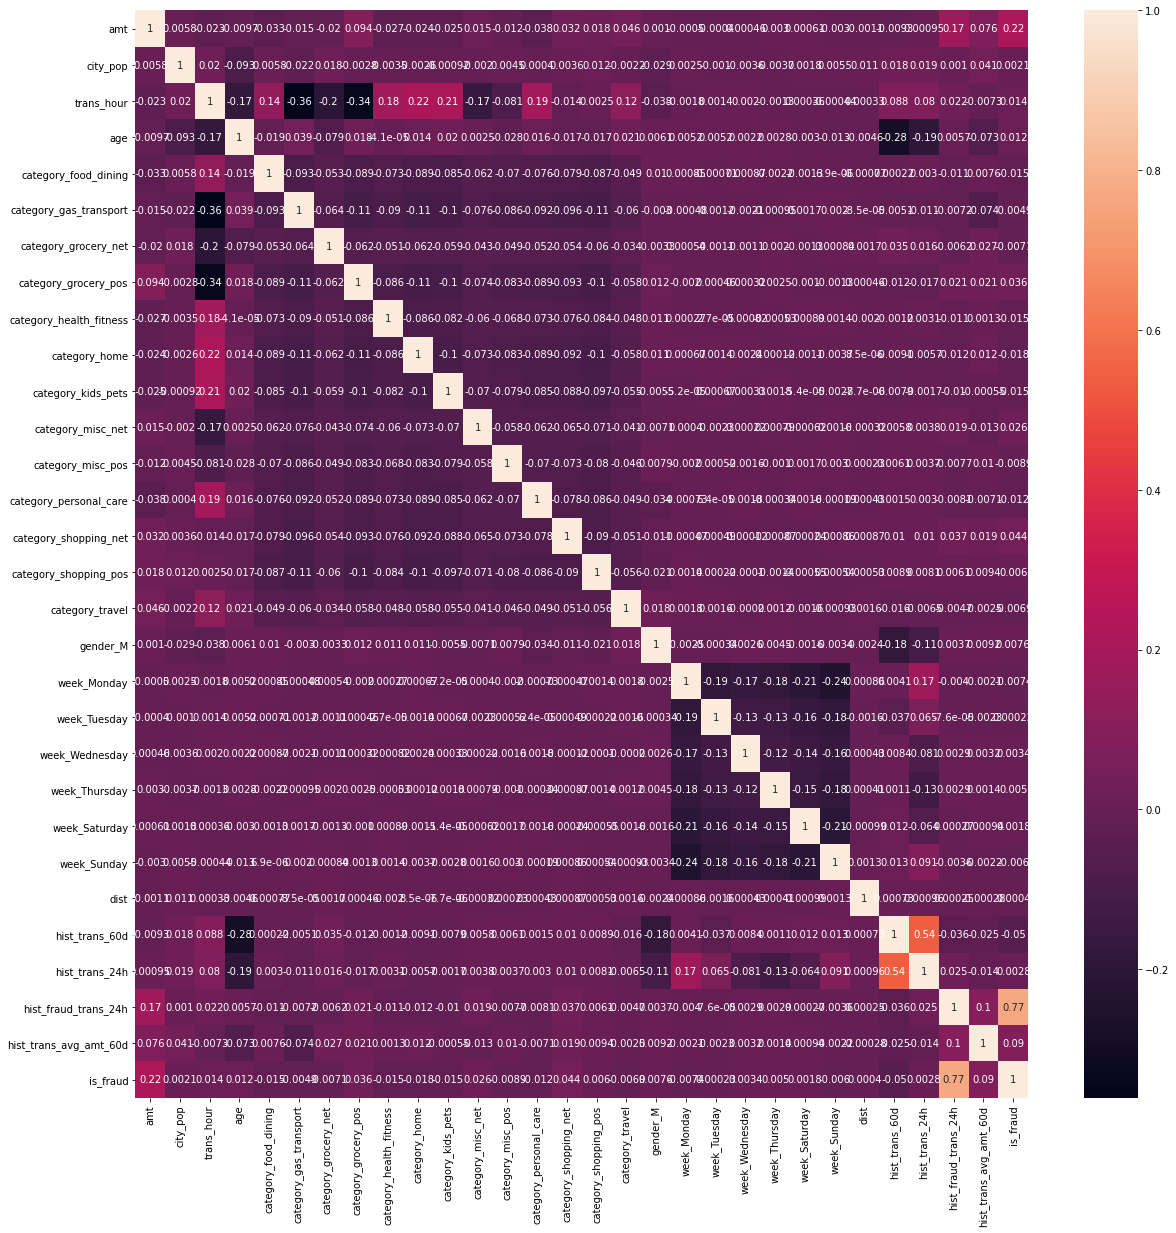

In [81]:
import seaborn as sn

fig, ax = plt.subplots(figsize=(20,20))
sn.heatmap(corr, annot=True)
plt.show()

hist_fraud_trans_24h is highly correlated with is_fraud - 0.77

hist_trans_24h is also correlated with hist_trans_60d   - 0.56

In [96]:
import plotly
import plotly.graph_objects as go 

ModuleNotFoundError: No module named 'plotly'

In [82]:
df2.head()

Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ... week_Tuesday  \
0    Banks      F                561 Perry Cove  ...            1   
1     Gill      F  43039 Riley Greens Suite 393  ...            1   
2  Sanchez      M      594 White Dale Suite 530  ...            1   
3    White      M   9443 Cynthia Court Apt. 038  ...            1   
4   Garcia      M              408 Bradley Rest  ...            1   

  week_Wednesday        dist  val_for_agg  trans_date  hist_trans_60d  \
0              0   78.597568            1  2019-01-01             1.0   
1              0   30.212176            1  2019-01-01             1.0   
2              0  108.206083            1  2019-01-01             8.0   
3              0   95.673231            1  2019-01-01             1.0   
4              0   77.556744            1  2019-01-01             1.0   

  hist_trans_24h hist_fraud_trans_24h hist_fraud_trans_2h  \
0            5.0                  0.0                 0.0   
1            2.0                  0.0                 0.0   
2            5.0                  0.0                 0.0   
3            6.0                  0.0                 0.0   
4            4.0                  0.0                 0.0   

   hist_trans_avg_amt_60d  
0                4.970000  
1               47.737903  
2              377.925000  
3               45.000000  
4               41.960000  

[5 rows x 55 columns]

In [83]:
df_fraud_merchant = df[['merchant','is_fraud','trans_num']].groupby(['merchant','is_fraud']).count().reset_index()
df_fraud_merchant.columns = ['Merchant','is_fraud','count']

df_fraud_merchant = df_fraud_merchant.merge(df_merchant[['Merchant','merchant_count','percent']],how='inner',\
                                  left_on='Merchant',right_on='Merchant')


df_fraud_merchant['percent_grp'] = (df_fraud_merchant['count']/df_fraud_merchant['merchant_count'])*100

In [84]:
df_job = df[['job','trans_num']].groupby(['job']).count().reset_index()
df_job.columns = ['Job','tran_count_by_job']

df_job['percent'] = (df_job['tran_count_by_job']/df_job['tran_count_by_job'].sum())*100

df_job.sort_values(by = ['percent'], ascending=False)

Job  tran_count_by_job   percent
193           Film/video editor               9779  0.754160
187         Exhibition designer               9199  0.709430
308             Naval architect               8684  0.669713
439    Surveyor, land/geomatics               8680  0.669404
286          Materials engineer               8270  0.637785
..                          ...                ...       ...
245         Information officer                  8  0.000617
482          Veterinary surgeon                  8  0.000617
487           Warehouse manager                  7  0.000540
421                 Ship broker                  7  0.000540
106  Contracting civil engineer                  7  0.000540

[494 rows x 3 columns]

In [85]:
df_fraud_job = df[['job','is_fraud','trans_num']].groupby(['job','is_fraud']).count().reset_index()
df_fraud_job.columns = ['Job','is_fraud','count']

df_fraud_job =  df_fraud_job.merge(df_job[['Job','tran_count_by_job','percent']],how='inner',\
                                  left_on='Job',right_on='Job')


df_fraud_job['percent_grp'] = (df_fraud_job['count']/df_fraud_job['tran_count_by_job'])*100

In [86]:
job_plt_data = df_fraud_job.sort_values(by = ["tran_count_by_job"], ascending = False).head(20)

In [87]:
job_plt_data

Job  is_fraud  count  tran_count_by_job   percent  \
359           Film/video editor         1     44               9779  0.754160   
358           Film/video editor         0   9735               9779  0.754160   
346         Exhibition designer         0   9148               9199  0.709430   
347         Exhibition designer         1     51               9199  0.709430   
572             Naval architect         0   8631               8684  0.669713   
573             Naval architect         1     53               8684  0.669713   
819    Surveyor, land/geomatics         1     50               8680  0.669404   
818    Surveyor, land/geomatics         0   8630               8680  0.669404   
530          Materials engineer         1     62               8270  0.637785   
529          Materials engineer         0   8208               8270  0.637785   
226  Designer, ceramics/pottery         1     12               8225  0.634315   
225  Designer, ceramics/pottery         0   8213               8225  0.634315   
828           Systems developer         1     13               7700  0.593827   
827           Systems developer         0   7687               7700  0.593827   
442                  IT trainer         0   7650               7679  0.592207   
443                  IT trainer         1     29               7679  0.592207   
361           Financial adviser         1     23               7659  0.590665   
360           Financial adviser         0   7636               7659  0.590665   
329    Environmental consultant         1     22               7547  0.582027   
328    Environmental consultant         0   7525               7547  0.582027   

     percent_grp  
359     0.449944  
358    99.550056  
346    99.445592  
347     0.554408  
572    99.389682  
573     0.610318  
819     0.576037  
818    99.423963  
530     0.749698  
529    99.250302  
226     0.145897  
225    99.854103  
828     0.168831  
827    99.831169  
442    99.622347  
443     0.377653  
361     0.300300  
360    99.699700  
329     0.291507  
328    99.708493

In [88]:
job_plt_data['label'] = 'Not Fraud'
job_plt_data.loc[job_plt_data['is_fraud']==1,['label']]= 'Fraud'
job_plt_data

Job  is_fraud  count  tran_count_by_job   percent  \
359           Film/video editor         1     44               9779  0.754160   
358           Film/video editor         0   9735               9779  0.754160   
346         Exhibition designer         0   9148               9199  0.709430   
347         Exhibition designer         1     51               9199  0.709430   
572             Naval architect         0   8631               8684  0.669713   
573             Naval architect         1     53               8684  0.669713   
819    Surveyor, land/geomatics         1     50               8680  0.669404   
818    Surveyor, land/geomatics         0   8630               8680  0.669404   
530          Materials engineer         1     62               8270  0.637785   
529          Materials engineer         0   8208               8270  0.637785   
226  Designer, ceramics/pottery         1     12               8225  0.634315   
225  Designer, ceramics/pottery         0   8213               8225  0.634315   
828           Systems developer         1     13               7700  0.593827   
827           Systems developer         0   7687               7700  0.593827   
442                  IT trainer         0   7650               7679  0.592207   
443                  IT trainer         1     29               7679  0.592207   
361           Financial adviser         1     23               7659  0.590665   
360           Financial adviser         0   7636               7659  0.590665   
329    Environmental consultant         1     22               7547  0.582027   
328    Environmental consultant         0   7525               7547  0.582027   

     percent_grp      label  
359     0.449944      Fraud  
358    99.550056  Not Fraud  
346    99.445592  Not Fraud  
347     0.554408      Fraud  
572    99.389682  Not Fraud  
573     0.610318      Fraud  
819     0.576037      Fraud  
818    99.423963  Not Fraud  
530     0.749698      Fraud  
529    99.250302  Not Fraud  
226     0.145897      Fraud  
225    99.854103  Not Fraud  
828     0.168831      Fraud  
827    99.831169  Not Fraud  
442    99.622347  Not Fraud  
443     0.377653      Fraud  
361     0.300300      Fraud  
360    99.699700  Not Fraud  
329     0.291507      Fraud  
328    99.708493  Not Fraud

In [89]:
ne_grp = job_plt_data['Job'].unique()
print(ne_grp)

rm_grp = job_plt_data['label'].unique()
print(rm_grp)

['Film/video editor' 'Exhibition designer' 'Naval architect'
 'Surveyor, land/geomatics' 'Materials engineer'
 'Designer, ceramics/pottery' 'Systems developer' 'IT trainer'
 'Financial adviser' 'Environmental consultant']
['Fraud' 'Not Fraud']


## Observations
* From above we can observe that there is alot of outliers present in almost most of the features .
* Now i am going to deal with these outliers .
* Outliers can be deal in different ways one of the way is applying Z-score on the dataset

In [90]:
# split features into Categorical and Numerical 
catogrical = [x for x in df2.columns if df2[x].dtype == "object"]
numeric = [x for x in df2.columns if df2[x].dtype == "float64"]

In [91]:
# filling null or missing values with mean or average 

for i in numeric:
    df2[i].fillna(df2[i].mean(), inplace = True)

In [92]:
df["dob"] = pd.to_datetime(df['dob'])
df["dob_year"] = df["dob"].dt.year
df["dob_day"] = df["dob"].dt.day
df["dob_month"] = df["dob"].dt.month

In [93]:
df["trans_date_trans_time"] = pd.to_datetime(df['trans_date_trans_time'])
df["year"] = df["trans_date_trans_time"].dt.year
df["day"] = df["trans_date_trans_time"].dt.day
df["month"] = df["trans_date_trans_time"].dt.month

In [94]:
# dropping un-necessary features
df2.drop(['Unnamed: 0','trans_date_trans_time','dob','year_month'],axis=1,inplace=True)


In [95]:
df2.head()

cc_num                            merchant       category  \
0  2703186189652095          fraud_Rippin, Kub and Mann       misc_net   
1      630423337322     fraud_Heller, Gutmann and Zieme    grocery_pos   
2    38859492057661                fraud_Lind-Buckridge  entertainment   
3  3534093764340240  fraud_Kutch, Hermiston and Farrell  gas_transport   
4   375534208663984                 fraud_Keeling-Crist       misc_pos   

      amt      first     last gender                        street  \
0    4.97   Jennifer    Banks      F                561 Perry Cove   
1  107.23  Stephanie     Gill      F  43039 Riley Greens Suite 393   
2  220.11     Edward  Sanchez      M      594 White Dale Suite 530   
3   45.00     Jeremy    White      M   9443 Cynthia Court Apt. 038   
4   41.96      Tyler   Garcia      M              408 Bradley Rest   

             city state  ...  week_Tuesday  week_Wednesday        dist  \
0  Moravian Falls    NC  ...             1               0   78.597568   
1          Orient    WA  ...             1               0   30.212176   
2      Malad City    ID  ...             1               0  108.206083   
3         Boulder    MT  ...             1               0   95.673231   
4        Doe Hill    VA  ...             1               0   77.556744   

   val_for_agg  trans_date hist_trans_60d  hist_trans_24h  \
0            1  2019-01-01            1.0             5.0   
1            1  2019-01-01            1.0             2.0   
2            1  2019-01-01            8.0             5.0   
3            1  2019-01-01            1.0             6.0   
4            1  2019-01-01            1.0             4.0   

   hist_fraud_trans_24h  hist_fraud_trans_2h  hist_trans_avg_amt_60d  
0                   0.0                  0.0                4.970000  
1                   0.0                  0.0               47.737903  
2                   0.0                  0.0              377.925000  
3                   0.0                  0.0               45.000000  
4                   0.0                  0.0               41.960000  

[5 rows x 51 columns]

In [96]:
# checking outliers 
#df2.plot(kind='box',subplots=True,layout=(2,23))

In [97]:
#Removing Outliers
#from scipy.stats import zscore
#z=np.abs(zscore(df2))

#threshold=3
#np.where((z>3))
#df2_new=df2[(z<3).all(axis=1)]#removing outliers

#print('Original dataset shape',df2.shape())
#print('after removing outliers dataset shape',df2_new.shape())

In [98]:
#from sklearn.preprocessing import LabelEncoder

#df3 = df2.copy()
#label_encoder = LabelEncoder()
#for col in catogrical:
 #   df[col] = label_encoder.fit_transform(df[col])
    
#df

<a id='5'></a>
# <p style="background-color:skyblue; font-family:newtimeroman; font-size:250%; text-align:center; border-radius: 15px 50px;">Building Machine Learning Model📚</p>

In [99]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.svm import SVC, LinearSVC
import seaborn as sns
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler,LabelEncoder
#Building XG Boost Model
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_curve,roc_auc_score


In [100]:
X_cols = ['amt','city_pop', 'trans_hour',
       'age', 'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       'gender_M','week_Monday','week_Tuesday', 'week_Wednesday','week_Thursday',
        'week_Saturday', 'week_Sunday','dist','hist_trans_60d','hist_trans_24h',
       'hist_fraud_trans_24h','hist_trans_avg_amt_60d'] #,

Y_cols = ['is_fraud']

## Feature Selection

In [103]:
df2.to_csv('EDA_data.csv')

Best alpha using built-in LassoCV: 3.453061
Best score using built-in LassoCV: 0.391785
Lasso picked 3 variables and eliminated the other 26 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

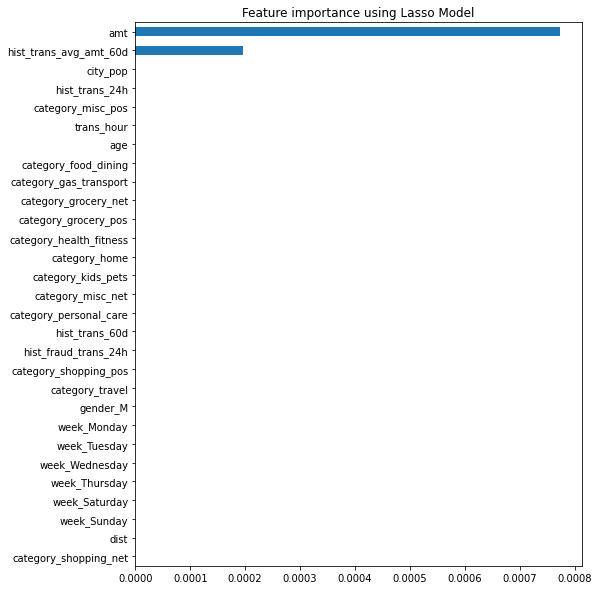

In [116]:
#Feature Selection using LassoCV

from sklearn.linear_model import LassoCV

#Feature Selection
X = df2[X_cols]  #Feature Matrix
y = df2[Y_cols]         #Target Variable

reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  
      str(sum(coef == 0)) + " variables")

imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [117]:
X = X.drop(['dist','category_shopping_net','city_pop','hist_trans_60d'],1)   #Feature Matrix

## Machine Learning model on Original Dataset

In [118]:
x=df2[X_cols]
y=df2[Y_cols]

In [119]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [120]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

#### Logistic Regression

In [121]:
lr=LogisticRegression(max_iter=10000)
lr.fit(X_train,y_train)

# Evaluate Model
lr_eval = evaluate_model(lr, X_test, y_test)

# Print result
print('Accuracy:', lr_eval['acc'])
print('Precision:', lr_eval['prec'])
print('Recall:', lr_eval['rec'])
print('F1 Score:', lr_eval['f1'])
print('Cohens Kappa Score:', lr_eval['kappa'])
print('Area Under Curve:', lr_eval['auc'])
print('Confusion Matrix:\n', lr_eval['cm'])

Accuracy: 0.8428063943161634
Precision: 0.9062011464304325
Recall: 0.7670930745478606
F1 Score: 0.8308647873865265
Cohens Kappa Score: 0.685922128616592
Area Under Curve: 0.862880744679991
Confusion Matrix:
 [[2057  180]
 [ 528 1739]]


In [122]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

[[4818  451]
 [1283 3956]]
              precision    recall  f1-score   support

           0       0.79      0.91      0.85      5269
           1       0.90      0.76      0.82      5239

    accuracy                           0.83     10508
   macro avg       0.84      0.83      0.83     10508
weighted avg       0.84      0.83      0.83     10508



## K-MEANS CLUSTERING

train_accuracy = []
test_accuracy = []
#Defining a function which will give us train and test accuracy for each classifier.
def train_test_error(y_train,y_test):
    train_error = ((y_train==y_train).sum())/len(y_train)*100
    test_error = ((y_test==y_test).sum())/len(y_test)*100
    train_accuracy.append(train_error)
    test_accuracy.append(test_error)
    print('{}'.format(train_error) + " is the train accuracy")
    print('{}'.format(test_error) + " is the test accuracy")

from sklearn.cluster import KMeans
kms = KMeans(n_clusters=2, random_state=1)
kms.fit(X_train,y_train)

train_predict = kms.predict(X_train)
test_predict = kms.predict(X_test)
train_test_error(train_predict,test_predict)

from sklearn import metrics 
confusion_matrix=metrics.confusion_matrix(y_test,test_predict)
confusion_matrix

### Decision Tree Classifier

In [ ]:
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
dt.fit(X_train, y_train)
# Evaluate Model
dt_eval = evaluate_model(dt, X_test, y_test)

# Print result
print('Accuracy:', dt_eval['acc'])
print('Precision:', dt_eval['prec'])
print('Recall:', dt_eval['rec'])
print('F1 Score:', dt_eval['f1'])
print('Cohens Kappa Score:', dt_eval['kappa'])
print('Area Under Curve:', dt_eval['auc'])
print('Confusion Matrix:\n', dt_eval['cm'])

In [ ]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

### Random Forest Classifier

In [ ]:
#Building Random Forest Model
rf_clf = RandomForestClassifier(n_estimators = 50,max_depth = 20,
                                random_state=345, verbose = 1)
rf_clf.fit(X_train, y_train)

print("Train Results")
# Evaluate Model
rf_eval = evaluate_model(rf_clf, X_test, y_test)

# Print result
print('Accuracy:', rf_eval['acc'])
print('Precision:', rf_eval['prec'])
print('Recall:', rf_eval['rec'])
print('F1 Score:', rf_eval['f1'])
print('Cohens Kappa Score:', rf_eval['kappa'])
print('Area Under Curve:', rf_eval['auc'])
print('Confusion Matrix:\n', rf_eval['cm'])

In [ ]:
y_train_pred = rf_clf.predict(X_train)
y_test_pred = rf_clf.predict(X_test)
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

### XGBClassifier

In [ ]:
#Building XG Boost Model
from xgboost import XGBClassifier

# fit model no training data
xbt_model = XGBClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 3, random_state=345, verbose = 1)
xbt_model.fit(X_train, y_train)
# Evaluate Model
xg_eval = evaluate_model(xbt_model, X_test, y_test)

# Print result
print('Accuracy:', xg_eval['acc'])
print('Precision:', xg_eval['prec'])
print('Recall:', xg_eval['rec'])
print('F1 Score:', xg_eval['f1'])
print('Cohens Kappa Score:', xg_eval['kappa'])
print('Area Under Curve:', xg_eval['auc'])
print('Confusion Matrix:\n', xg_eval['cm'])

In [ ]:
y_train_pred = xbt_model.predict(X_train)
y_test_pred = xbt_model.predict(X_test)
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

## Model Comparission on Original Dataset

In [ ]:
# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.2
dtc_score = [dt_eval['acc'], dt_eval['prec'], dt_eval['rec'], dt_eval['f1'], dt_eval['kappa']]
rf_score = [rf_eval['acc'], rf_eval['prec'], rf_eval['rec'], rf_eval['f1'], rf_eval['kappa']]
xg_score = [xg_eval['acc'], xg_eval['prec'], xg_eval['rec'], xg_eval['f1'], xg_eval['kappa']]
lr_score = [lr_eval['acc'], lr_eval['prec'], lr_eval['rec'], lr_eval['f1'], lr_eval['kappa']]

## Set position of bar on X axis
r1 = np.arange(len(dtc_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

## Make the plot
ax1.bar(r1, dtc_score, width=barWidth, edgecolor='white', label='Decision Tree')
ax1.bar(r2, rf_score, width=barWidth, edgecolor='white', label='Random Forest')
ax1.bar(r3, xg_score, width=barWidth, edgecolor='white', label='XGBClassifier')
ax1.bar(r4, lr_score, width=barWidth, edgecolor='white', label='Logistic Regression')

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(dtc_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
## Comparing ROC Curve
ax2.plot(dt_eval['fpr'], dt_eval['tpr'], label='Decision Tree, auc = {:0.5f}'.format(dt_eval['auc']))
ax2.plot(rf_eval['fpr'], rf_eval['tpr'], label='Random Forest, auc = {:0.5f}'.format(rf_eval['auc']))
ax2.plot(xg_eval['fpr'], xg_eval['tpr'], label='XGBClassifier, auc = {:0.5f}'.format(xg_eval['auc']))
ax2.plot(lr_eval['fpr'], lr_eval['tpr'], label='Logistic Regression, auc = {:0.5f}'.format(lr_eval['auc']))

## Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()

## Under sampling on Dataset

## Over sampling on Dataset

In [148]:
#As this dataset is highly imbalance we have to balance this by over sampling
cnt_non_fraud = df2[df2['is_fraud'] == 0]['amt'].count()
df2_class_fraud = df2[df2['is_fraud'] == 1]
df2_class_nonfraud = df2[df2['is_fraud'] == 0]

In [149]:
#OverSampling
df2_class_fraud_oversample = df2_class_fraud.sample(cnt_non_fraud, replace=True)
df2_oversampled = pd.concat([df2_class_nonfraud, df2_class_fraud_oversample], axis=0)

print('Random over-sampling:')
print(df2_oversampled['is_fraud'].value_counts())

Random over-sampling:
0    1289209
1    1289209
Name: is_fraud, dtype: int64


In [ ]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(df2_oversampled[X_cols],df2_oversampled[Y_cols] , train_size=0.7, test_size=0.3, random_state=42)

In [ ]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

## Logistic Regression

In [ ]:
lr=LogisticRegression(max_iter=10000)
lr.fit(X_train,y_train)

# Evaluate Model
lr_eval = evaluate_model(lr, X_test, y_test)

# Print result
print('Accuracy:', lr_eval['acc'])
print('Precision:', lr_eval['prec'])
print('Recall:', lr_eval['rec'])
print('F1 Score:', lr_eval['f1'])
print('Cohens Kappa Score:', lr_eval['kappa'])
print('Area Under Curve:', lr_eval['auc'])
print('Confusion Matrix:\n', lr_eval['cm'])

## Decision Tree Classifier

In [ ]:
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
dt.fit(X_train, y_train)
# Evaluate Model
dt_eval = evaluate_model(dt, X_test, y_test)

# Print result
print('Accuracy:', dt_eval['acc'])
print('Precision:', dt_eval['prec'])
print('Recall:', dt_eval['rec'])
print('F1 Score:', dt_eval['f1'])
print('Cohens Kappa Score:', dt_eval['kappa'])
print('Area Under Curve:', dt_eval['auc'])
print('Confusion Matrix:\n', dt_eval['cm'])

## Random Forest Classifier

In [ ]:
#Building Random Forest Model
rf_clf = RandomForestClassifier(n_estimators = 50,max_depth = 20,
                                random_state=345, verbose = 1)
rf_clf.fit(X_train, y_train)

print("Train Results")
# Evaluate Model
rf_eval = evaluate_model(rf_clf, X_test, y_test)

# Print result
print('Accuracy:', rf_eval['acc'])
print('Precision:', rf_eval['prec'])
print('Recall:', rf_eval['rec'])
print('F1 Score:', rf_eval['f1'])
print('Cohens Kappa Score:', rf_eval['kappa'])
print('Area Under Curve:', rf_eval['auc'])
print('Confusion Matrix:\n', rf_eval['cm'])

## XGBClassifier

In [ ]:
#Building XG Boost Model
from xgboost import XGBClassifier

# fit model no training data
xbt_model = XGBClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 3, random_state=345, verbose = 1)
xbt_model.fit(X_train, y_train)
# Evaluate Model
xg_eval = evaluate_model(xbt_model, X_test, y_test)

# Print result
print('Accuracy:', xg_eval['acc'])
print('Precision:', xg_eval['prec'])
print('Recall:', xg_eval['rec'])
print('F1 Score:', xg_eval['f1'])
print('Cohens Kappa Score:', xg_eval['kappa'])
print('Area Under Curve:', xg_eval['auc'])
print('Confusion Matrix:\n', xg_eval['cm'])

In [ ]:
# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.2
dtc_score = [dt_eval['acc'], dt_eval['prec'], dt_eval['rec'], dt_eval['f1'], dt_eval['kappa']]
rf_score = [rf_eval['acc'], rf_eval['prec'], rf_eval['rec'], rf_eval['f1'], rf_eval['kappa']]
xg_score = [xg_eval['acc'], xg_eval['prec'], xg_eval['rec'], xg_eval['f1'], xg_eval['kappa']]
lr_score = [lr_eval['acc'], lr_eval['prec'], lr_eval['rec'], lr_eval['f1'], lr_eval['kappa']]

## Set position of bar on X axis
r1 = np.arange(len(dtc_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

## Make the plot
ax1.bar(r1, dtc_score, width=barWidth, edgecolor='white', label='Decision Tree')
ax1.bar(r2, rf_score, width=barWidth, edgecolor='white', label='Random Forest')
ax1.bar(r3, xg_score, width=barWidth, edgecolor='white', label='XGBClassifier')
ax1.bar(r4, lr_score, width=barWidth, edgecolor='white', label='Logistic Regression')

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(dtc_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
## Comparing ROC Curve
ax2.plot(dt_eval['fpr'], dt_eval['tpr'], label='Decision Tree, auc = {:0.5f}'.format(dt_eval['auc']))
ax2.plot(rf_eval['fpr'], rf_eval['tpr'], label='Random Forest, auc = {:0.5f}'.format(rf_eval['auc']))
ax2.plot(xg_eval['fpr'], xg_eval['tpr'], label='XGBClassifier, auc = {:0.5f}'.format(xg_eval['auc']))
ax2.plot(lr_eval['fpr'], lr_eval['tpr'], label='Logistic Regression, auc = {:0.5f}'.format(lr_eval['auc']))

## Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()

## Hyper parmeter tuning

In [ ]:
import numpy as np 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

random_search = {'criterion': ['entropy', 'gini'],
               'max_depth': [2],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [4, 6, 8],
               'min_samples_split': [5, 7,10],
               'n_estimators': [20]}

clf = RandomForestClassifier()
model = RandomizedSearchCV(estimator = clf, param_distributions = random_search, n_iter = 10, 
                               cv = 4, verbose= 1, random_state= 101, n_jobs = -1)
model.fit(X_train,y_train)

In [ ]:
table = pd.pivot_table(pd.DataFrame(model.cv_results_),
    values='mean_test_score', index='param_n_estimators', 
                       columns='param_criterion')
     
sns.heatmap(table)

We can now evaluate how our model performed using Random Search. In this case, using Random Search leads to a consistent increase in accuracy compared to our base model.

In [ ]:
predictionforest = model.best_estimator_.predict(X_test)
print(confusion_matrix(y_test,predictionforest))
print(classification_report(y_test,predictionforest))
acc3 = accuracy_score(y_test,predictionforest)